In [2]:
import pandas as pd
import numpy as np
import random

# Number of students
num_students = 100

# Sample names (expand for more variety)
first_names = ['Juan', 'María', 'Pedro', 'Ana', 'Luis', 'Sofia', 'Lucas', 'Valentina', 'Martín', 'Camila']
last_names = ['González', 'Rodríguez', 'Pérez', 'Fernández', 'López', 'García', 'Martínez', 'Sánchez', 'Romero', 'Torres']

# Generate names
names = [f"{random.choice(first_names)} {random.choice(last_names)}" for _ in range(num_students)]

# Generate DNI numbers (simplified for example)
dni_numbers = [random.randint(10000000, 50000000) for _ in range(num_students)]

# Subjects
subjects = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Inglés', 'Biología', 'Física', 'Química', 'Educación Física', 'Arte']

# Create a list to store student data
student_data = []

# Generate data for each student
for i in range(num_students):
    for subject in subjects:
        # Generate grades with a slightly skewed distribution
        grade1 = max(1, int(np.random.normal(7, 2)))  # Mean 7, SD 2, minimum 1
        grade2 = max(1, int(np.random.normal(7, 2)))
        grade3 = max(1, int(np.random.normal(7, 2)))

        # Generate absences with a Poisson distribution (average 5 absences)
        absences = np.random.poisson(5)

        student_data.append([
            names[i],
            dni_numbers[i],
            subject,
            grade1,
            grade2,
            grade3,
            absences
        ])

# Create DataFrame
df = pd.DataFrame(student_data, columns=['Nombre y Apellido', 'DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a Clases'])

# Display the DataFrame
df.head()

,Nombre y Apellido,DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a Clases
0,Lucas García,36482859,Matemática,5,6,9,4
1,Lucas García,36482859,Lengua y Literatura,8,7,9,5
2,Lucas García,36482859,Historia,9,1,6,7
3,Lucas García,36482859,Geografía,8,8,9,2
4,Lucas García,36482859,Inglés,7,9,6,10


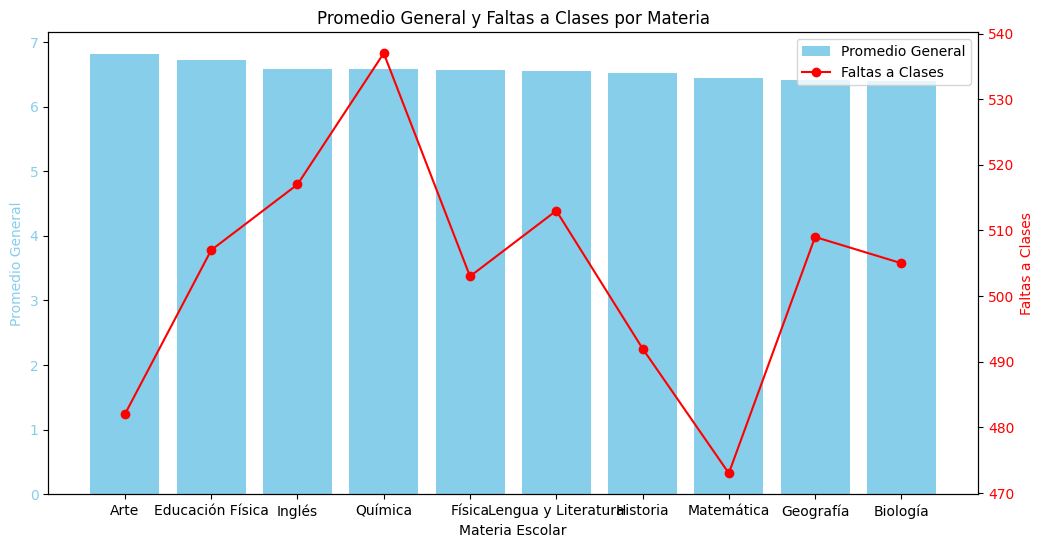

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el promedio de las notas de cada materia
df['Promedio'] = (df['Nota 1er Trimestre'] + df['Nota 2do Trimestre'] + df['Nota 3er Trimestre']) / 3

# Agrupar por materia y calcular el promedio general y la suma de faltas
materia_promedio = df.groupby('Materia Escolar').agg({'Promedio': 'mean', 'Faltas a Clases': 'sum'})

# Ordenar por promedio de mayor a menor
materia_promedio = materia_promedio.sort_values(by=['Promedio'], ascending=False)

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para el promedio
ax1.bar(materia_promedio.index, materia_promedio['Promedio'], color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params('y', labelcolor='skyblue')

# Crear un segundo eje para las faltas
ax2 = ax1.twinx()
ax2.plot(materia_promedio.index, materia_promedio['Faltas a Clases'], color='red', marker='o', label='Faltas a Clases')
ax2.set_ylabel('Faltas a Clases', color='red')
ax2.tick_params('y', labelcolor='red')

# Ajustar la rotación de las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Agregar leyenda
plt.title('Promedio General y Faltas a Clases por Materia')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Mostrar el gráfico
plt.show()